# Python 101 for MVPs 
Hello everyone. *Welcome to the Python tour at the Excel MVP Virtual summit*. 



In [45]:
#hello world
print("hello world")


hello world


In [48]:
#create a function with input and call it
def say_hello(recipient):
    s = 'Hello, {}!'.format(recipient)
    return s

#call the function
say_hello('Excel MVPs')


'Hello, Excel MVPs!'

In [49]:
#loops
for x in range(0, 3):
    print("We're on time %d" % (x))

We're on time 0
We're on time 1
We're on time 2


# Pythons love Pandas
[Pandas](https://pandas.org) is a open source, fast and powerful library at handling data. It is used by almost everyone when working with data. Pandas lets you work with data across a variety of artifacts. At core is a datastructre called the data frame, which looks like a grid

![Pandas](https://pandas.pydata.org/docs/_images/01_table_dataframe1.svg)

In [65]:
import pandas as pd

#pandas - simple example but imagine you're dealing with large data sets
df = pd.DataFrame({
        "Name": ["Braund, Mr. Owen Harris",
                 "Allen, Mr. William Henry",
                 "Bonnell, Miss. Elizabeth"],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"]}
   )

df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


In [52]:
#get contoso sales from 2018, Q3
df = pd.read_excel("ContosoFruitSales2018.xlsx", sheet_name="Q3")

#return top 10 results
df


,account,Product,Sold,Month
0,Contoso,Apples,83641,July
1,Contoso,Oranges,42351,July
2,Contoso,Bananas,97350,July
3,Contoso,Grapes,47651,July
4,Contoso,Apples,82935,August
5,Contoso,Oranges,33621,August
6,Contoso,Bananas,91100,August
7,Contoso,Grapes,96482,August
8,Contoso,Apples,40039,September
9,Contoso,Oranges,2224,September


In [53]:
#read excel file and combine all sheets into one frame
df19 = pd.concat(pd.read_excel("ContosoFruitSales2019.xlsx", sheet_name=None), ignore_index=True)

#Get top 10
df19.head(10)

,account,Product,Sold,Month
0,Contoso,Apples,71865,January
1,Contoso,Oranges,92297,January
2,Contoso,Bananas,23616,January
3,Contoso,Grapes,15358,January
4,Contoso,Apples,24189,February
5,Contoso,Oranges,63779,February
6,Contoso,Bananas,69531,February
7,Contoso,Grapes,35509,February
8,Contoso,Apples,76239,March
9,Contoso,Oranges,72733,March


In [67]:
#Get Contoso Sales for past 5 years
all_data = pd.DataFrame()
years = ["2016", "2017", "2018", "2019"]

for year in years:
    #get sales by year
    df = pd.concat(pd.read_excel("ContosoFruitSales" + year + ".xlsx", sheet_name=None), ignore_index=True)
    #append the year sales to master data frame
    all_data = all_data.append(df,ignore_index=True)
    
all_data.describe()

SyntaxError: invalid syntax (<ipython-input-67-9bedf17c2244>, line 3)

# Data Visualizations
You can use libraries to create custom data visualizations. Here we'll use a couple of popular libraries - matplotlib for basic charting and seaborn

In [58]:
#import the libraries. Note: you many need to "pip install <library name>"
import pandas as pd
%matplotlib inline   #magic line for Jupyter notebooks to display the charts inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#create a dataframe with random numbers
df = pd.DataFrame()
df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)
df.head()

,x,y
0,59,50
1,97,82
2,7,84
3,62,15
4,11,54


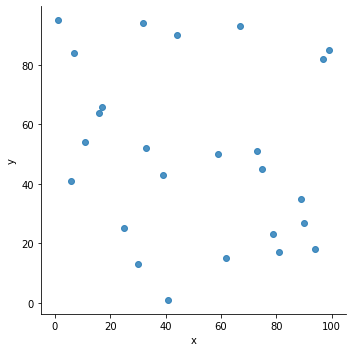

In [63]:
#create x-y scatter
sns.lmplot('x', 'y', data=df, fit_reg=False)

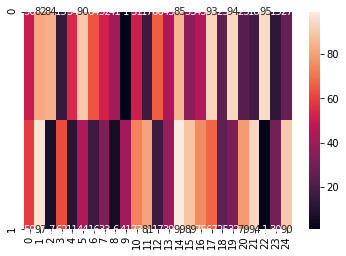

In [64]:
#create heatmap
sns.heatmap([df.y, df.x], annot=True, fmt="d")